In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

Los datos a utilizar en el primer datframe se encuentran en: https://www.kaggle.com/datasets/thedevastator/global-video-game-sales

Este conjunto de datos, procedente de vgchartz.com, ofrece una gran cantidad de información sobre la dinámica entre plataforma y género para los 100 mejores videojuegos del mundo. Observe qué plataformas están impulsando las ventas globales, qué géneros han tenido más éxito en diferentes regiones del mundo y cómo estos dos factores han cambiado con el tiempo. ¡Analice estos datos para informar su comprensión de la industria del juego y descubra las tendencias que impulsan a los desarrolladores de juegos al éxito!

Como objetivos para este data set tenemos Sondear la relación entre el gasto en videojuegos y la satisfacción del usuario para comprender el comportamiento del consumidor y Examinar las combinaciones de plataformas y géneros más populares en los 100 mejores juegos para informar las decisiones de desarrollo de juegos.


Este es un problema de regresion para modelar la relación entre el gasto en videojuegos y la satisfacción del usuario. ya que este metodo me puede puede ayudar a descubrir que aspectos de los juegos son los mas valorados por los usuarios y se puede mejorar los juegos para satisfacer sus necesidad

El reto que representa este Data set es de modelizacion

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Bootcamp Data Science/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# cuantas filas y columnas tiene?
df.shape
# con el metodo ".shape" podemos ver cuantas filas y cuantas columnas tiene el dataframe, en la primera entrada se representan el numero de filas y la segunda entrada representa el numero de columnas.


(16598, 11)

In [ ]:
# para especificar las caracteristicas
caracteristicas = df.shape[1]
print(caracteristicas)

11


Parte 2

In [29]:
# Verificar si hay datos duplicados
df.duplicated().sum()

0

En este dataset no existen datos duplicados

Como columnas innecesaria eliminare 'rank','year', 'publisher' y 'Other_Sales'.

ya que 'Rank' el ranking de ventas globales y para los objetivos del data set lo considero innecesario.

Por la parte de 'year' representa el año de publicacion de los videos juegos y para saber la satisfaccion del consumidor final no es muy importante.

'publisher' represneta la publicidad creada por la editorial y no afecta para nada en la busqueda de satisfaccion al consumidor final sobre el producto

'Other_Sales' Esta representa las ventas en otras regiones no especificadas asi que no le doy mucha importancia

In [81]:
# Eliminacion de columnas inutiles para el modelo
df2= df.drop(['Rank','Year','Publisher','Other_Sales','Name',], axis=1)

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Genre         16598 non-null  object 
 3   NA_Sales      16598 non-null  float64
 4   EU_Sales      16598 non-null  float64
 5   JP_Sales      16598 non-null  float64
 6   Global_Sales  16598 non-null  float64
dtypes: float64(4), object(3)
memory usage: 907.8+ KB


In [33]:
df2.head()

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii Sports,Wii,Sports,41.49,29.02,3.77,82.74
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,40.24
2,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,35.82
3,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,31.37


In [39]:
nulos_count= df2.isnull().sum()
nulos_count

Name            0
Platform        0
Genre           0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Global_Sales    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

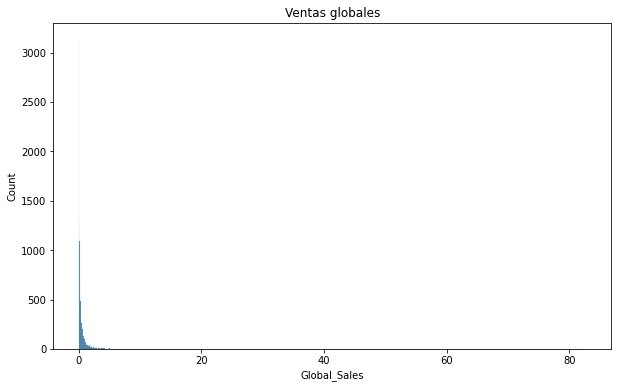

In [60]:
# Visualizacion de la variable objetivo 'Global_Sales'
plt.figure(figsize=(10,6))
sns.histplot(data=df2, x="Global_Sales")
plt.title("Ventas globales")
plt.show

En el histograma de Ventas globales vemos que vemos que tiene ventas globales muy bajas. tambien se puede observar que algunos titulos con ventas globales muy alta, es decir, que un pequeño grupo de videojuegos fueron muy exitoso e terminos de ventas

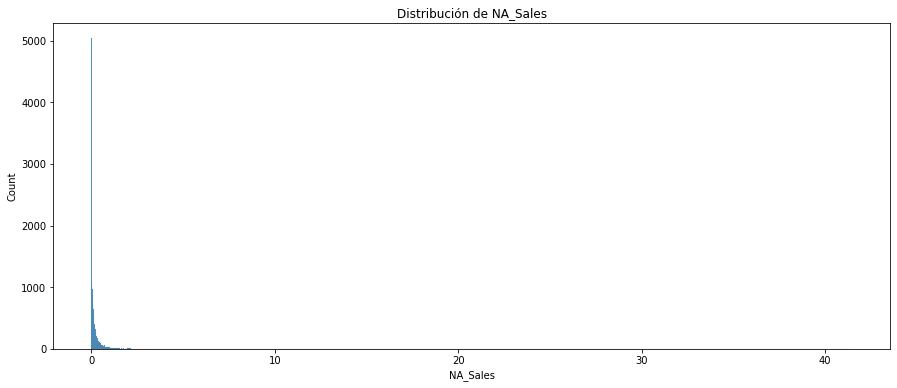

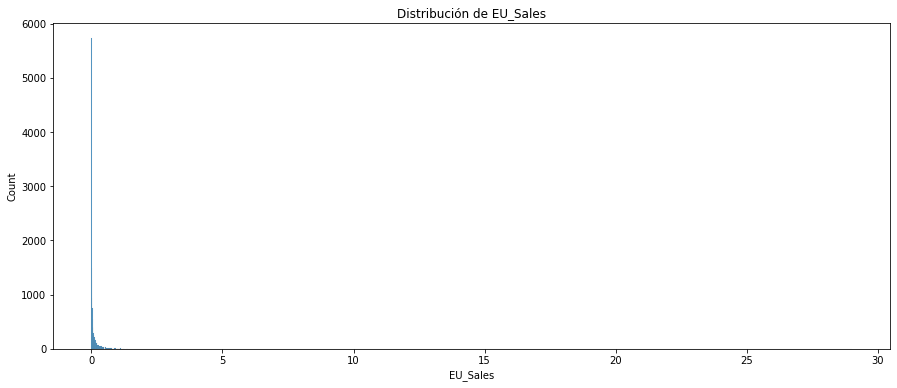

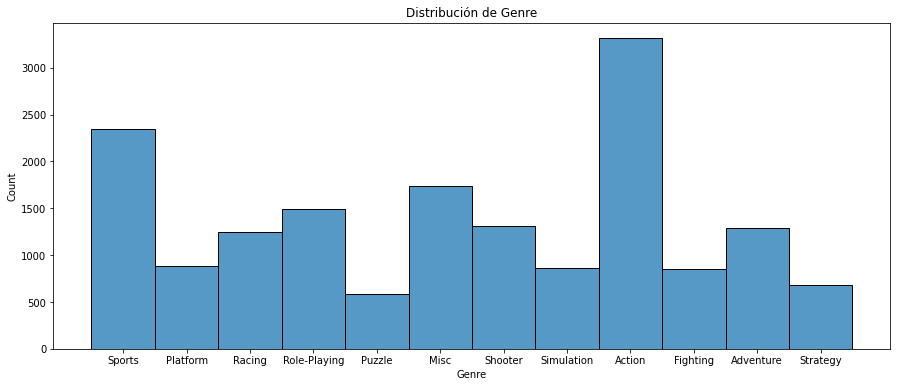

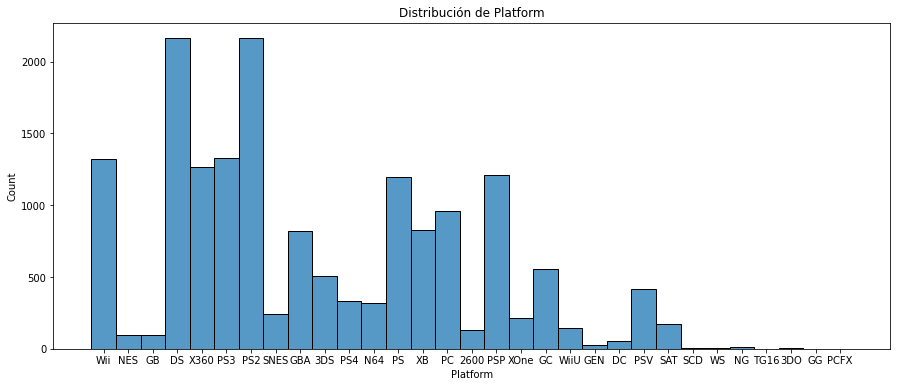

In [79]:
columnas = ['NA_Sales','EU_Sales','Genre','Platform']
for columna in columnas:
    plt.figure(figsize=(15,6))
    sns.histplot(data=df, x=columna)
    plt.title("Distribución de " + columna)
    plt.show()

En los dos primeros histogrmas podemos ver la distribucion de las ventas tanto en EU (Europa) como en NA (Estados Unidos).

En el tercer histograma muestra las ventas de los generos de videojuegos mas vendidos

En el ultimo podemos ver las consolas o las plataforas de videojuegos que los consumidores finales mas utilizan

<AxesSubplot:>

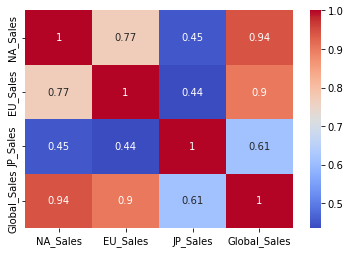

In [46]:
sns.heatmap(df2.corr(),annot=True, cmap='coolwarm')